In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

from sklearn.impute import KNNImputer
from datetime import datetime

In [2]:
os.chdir('/Users/zhaoweikennethlim/Desktop/URA_ML_pipeline')

In [3]:
os.getcwd()

'/Users/zhaoweikennethlim/Desktop/URA_ML_pipeline'

In [4]:
project_df = pd.read_csv('data/projects.csv')
transaction_df = pd.read_csv('data/transactions.csv')

In [5]:
transaction_df = transaction_df[transaction_df['property_type'] == 'Executive Condominium']

In [6]:
merged_df = pd.merge(transaction_df, project_df, how='left', left_on='project_id', right_on='id')
merged_df.drop(columns=[col for col in merged_df.columns if col.endswith("_x") or col.endswith("_y")], inplace=True)

In [7]:
merged_df['market_segment'].value_counts(normalize=True)

market_segment
OCR    0.997198
RCR    0.002802
Name: proportion, dtype: float64

In [10]:
project_df['market_segment'].value_counts(normalize=True)

market_segment
OCR    0.423784
RCR    0.316453
CCR    0.259763
Name: proportion, dtype: float64

In [8]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14990 entries, 0 to 14989
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   project_id        14990 non-null  int64  
 1   transaction_date  14990 non-null  object 
 2   area              14990 non-null  float64
 3   price             14990 non-null  float64
 4   nett_price        14990 non-null  float64
 5   property_type     14990 non-null  object 
 6   tenure            14990 non-null  object 
 7   type_of_area      14990 non-null  object 
 8   floor_range       14990 non-null  object 
 9   type_of_sale      14990 non-null  int64  
 10  district          14990 non-null  int64  
 11  no_of_units       14990 non-null  int64  
 12  project_name      14990 non-null  object 
 13  market_segment    14990 non-null  object 
 14  street            14990 non-null  object 
 15  x_coordinate      13594 non-null  float64
 16  y_coordinate      13594 non-null  float6

In [8]:
df = merged_df[merged_df['property_type'] == 'Executive Condominium']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14990 entries, 51950 to 131464
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   project_id        14990 non-null  int64  
 1   transaction_date  14990 non-null  object 
 2   area              14990 non-null  float64
 3   price             14990 non-null  float64
 4   nett_price        14990 non-null  float64
 5   property_type     14990 non-null  object 
 6   tenure            14990 non-null  object 
 7   type_of_area      14990 non-null  object 
 8   floor_range       14990 non-null  object 
 9   type_of_sale      14990 non-null  int64  
 10  district          14990 non-null  int64  
 11  no_of_units       14990 non-null  int64  
 12  project_name      14990 non-null  object 
 13  market_segment    14990 non-null  object 
 14  street            14990 non-null  object 
 15  x_coordinate      13594 non-null  float64
 16  y_coordinate      13594 non-null  float6

In [8]:
print(f"Before dropping of duplicates: {len(df)}")
df.drop_duplicates(inplace=True)
print(f"After dropping of duplicates: {len(df)}")

Before dropping of duplicates: 14990
After dropping of duplicates: 14122


/var/folders/vs/pf5rcszd1snbpqpxzh4lgbgw0000gn/T/ipykernel_33467/814714253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14122 entries, 51950 to 131463
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   project_id        14122 non-null  int64  
 1   transaction_date  14122 non-null  object 
 2   area              14122 non-null  float64
 3   price             14122 non-null  float64
 4   nett_price        14122 non-null  float64
 5   property_type     14122 non-null  object 
 6   tenure            14122 non-null  object 
 7   type_of_area      14122 non-null  object 
 8   floor_range       14122 non-null  object 
 9   type_of_sale      14122 non-null  int64  
 10  district          14122 non-null  int64  
 11  no_of_units       14122 non-null  int64  
 12  project_name      14122 non-null  object 
 13  market_segment    14122 non-null  object 
 14  street            14122 non-null  object 
 15  x_coordinate      13034 non-null  float64
 16  y_coordinate      13034 non-null  float6

In [12]:
df.describe()

,project_id,area,price,nett_price,type_of_sale,district,no_of_units,x_coordinate,y_coordinate
count,14122.000000,14122.000000,1.412200e+04,14122.0,14122.000000,14122.000000,14122.0,13034.000000,13034.000000
mean,3257.694519,104.645943,1.272801e+06,0.0,2.309446,22.192466,1.0,31257.935007,42179.493363
std,601.375745,22.541148,2.970697e+05,0.0,0.950951,3.667032,0.0,7229.712370,3382.402135
min,1924.000000,46.000000,5.200000e+05,0.0,1.000000,18.000000,1.0,12779.295910,34888.524400
25%,2584.000000,90.000000,1.050000e+06,0.0,1.000000,19.000000,1.0,27164.747700,39816.591000
50%,3603.000000,100.000000,1.250000e+06,0.0,3.000000,22.000000,1.0,33151.483040,42110.262580
75%,3714.000000,116.000000,1.442458e+06,0.0,3.000000,27.000000,1.0,36319.109590,45181.032820
max,3962.000000,359.000000,3.288000e+06,0.0,3.000000,28.000000,1.0,42109.658280,47774.058512


In [9]:
print(f"Percent of missing values: {np.round(df.isnull().sum() / len(df) * 100, 2)}")

Percent of missing values: project_id          0.0
transaction_date    0.0
area                0.0
price               0.0
nett_price          0.0
property_type       0.0
tenure              0.0
type_of_area        0.0
floor_range         0.0
type_of_sale        0.0
district            0.0
no_of_units         0.0
project_name        0.0
market_segment      0.0
street              0.0
x_coordinate        7.7
y_coordinate        7.7
dtype: float64


In [13]:
df['no_of_units'].value_counts()

no_of_units
1    14122
Name: count, dtype: int64

In [10]:
df.loc[:, 'month'] = df.loc[:, 'transaction_date'].apply(lambda x: x.split('-')[1])
df.loc[:, 'year'] = df.loc[:, 'transaction_date'].apply(lambda x: x.split('-')[0])

/var/folders/vs/pf5rcszd1snbpqpxzh4lgbgw0000gn/T/ipykernel_33467/2334139422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'month'] = df.loc[:, 'transaction_date'].apply(lambda x: x.split('-')[1])
/var/folders/vs/pf5rcszd1snbpqpxzh4lgbgw0000gn/T/ipykernel_33467/2334139422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'year'] = df.loc[:, 'transaction_date'].apply(lambda x: x.split('-')[0])


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14122 entries, 51950 to 131463
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   project_id        14122 non-null  int64  
 1   transaction_date  14122 non-null  object 
 2   area              14122 non-null  float64
 3   price             14122 non-null  float64
 4   nett_price        14122 non-null  float64
 5   property_type     14122 non-null  object 
 6   tenure            14122 non-null  object 
 7   type_of_area      14122 non-null  object 
 8   floor_range       14122 non-null  object 
 9   type_of_sale      14122 non-null  int64  
 10  district          14122 non-null  int64  
 11  no_of_units       14122 non-null  int64  
 12  project_name      14122 non-null  object 
 13  market_segment    14122 non-null  object 
 14  street            14122 non-null  object 
 15  x_coordinate      13034 non-null  float64
 16  y_coordinate      13034 non-null  float6

In [13]:
df['tenure'].value_counts()

tenure
99 yrs lease commencing from 2012    1781
99 yrs lease commencing from 2014    1495
99 yrs lease commencing from 2021    1451
99 yrs lease commencing from 2013    1431
99 yrs lease commencing from 2018    1341
99 yrs lease commencing from 2011    1238
99 yrs lease commencing from 1997     984
99 yrs lease commencing from 2010     960
99 yrs lease commencing from 2020     808
99 yrs lease commencing from 2019     630
99 yrs lease commencing from 2022     613
99 yrs lease commencing from 2015     430
99 yrs lease commencing from 2000     251
99 yrs lease commencing from 1996     181
99 yrs lease commencing from 2002     149
99 yrs lease commencing from 2001     132
99 yrs lease commencing from 2004     128
99 yrs lease commencing from 2003      85
99 yrs lease commencing from 2016      32
99 years leasehold                      2
Name: count, dtype: int64

In [12]:
# Get the current year
current_year = datetime.now().year

# Function to extract lease start year
def extract_lease_start_year(tenure):
    if 'commencing from' in tenure:
        return int(tenure.split('commencing from')[-1].strip())
    return current_year  # Return 0 or some other default for cases without a valid year

# Calculate the remaining lease
#df['start_year'] = df['tenure'].apply(extract_lease_start_year)
df.loc[:, 'remaining_lease'] = 99 - (current_year - df.loc[:, 'tenure'].apply(extract_lease_start_year))

/var/folders/vs/pf5rcszd1snbpqpxzh4lgbgw0000gn/T/ipykernel_33467/2389543346.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'remaining_lease'] = 99 - (current_year - df.loc[:, 'tenure'].apply(extract_lease_start_year))


In [13]:
# Function to extract the middle story
def extract_middle_story(floor_range):
    lower, upper = map(int, floor_range.split('-'))
    return (lower + upper) // 2

# Apply the function to the 'floor_range' column
df.loc[:, 'middle_story'] = df.loc[:, 'floor_range'].apply(extract_middle_story)

/var/folders/vs/pf5rcszd1snbpqpxzh4lgbgw0000gn/T/ipykernel_33467/3107117151.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'middle_story'] = df.loc[:, 'floor_range'].apply(extract_middle_story)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14122 entries, 51950 to 131463
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   project_id        14122 non-null  int64  
 1   transaction_date  14122 non-null  object 
 2   area              14122 non-null  float64
 3   price             14122 non-null  float64
 4   nett_price        14122 non-null  float64
 5   property_type     14122 non-null  object 
 6   tenure            14122 non-null  object 
 7   type_of_area      14122 non-null  object 
 8   floor_range       14122 non-null  object 
 9   type_of_sale      14122 non-null  int64  
 10  district          14122 non-null  int64  
 11  no_of_units       14122 non-null  int64  
 12  project_name      14122 non-null  object 
 13  market_segment    14122 non-null  object 
 14  street            14122 non-null  object 
 15  x_coordinate      13034 non-null  float64
 16  y_coordinate      13034 non-null  float6

In [17]:
null_df = df[df.isnull().any(axis=1)]

In [18]:
null_df.shape

(1088, 21)

In [19]:
null_df['district'].value_counts()

district
23    614
24    474
Name: count, dtype: int64

In [21]:
null_df['street'].value_counts()

street
TENGAH GARDEN WALK           474
BUKIT BATOK WEST AVENUE 5    355
BUKIT BATOK WEST AVENUE 8    259
Name: count, dtype: int64

In [22]:
null_df['type_of_sale'].value_counts()

type_of_sale
1    1088
Name: count, dtype: int64

In [39]:
print(f"Percentage of null from district 24: {len(null_df[null_df['district'] == 24]) / len(df) * 100}")
print(f"Percentage of null from district 23: {len(null_df[null_df['district'] == 23]) / len(df) * 100} ")

Percentage of null from district 24: 3.3564650899306048
Percentage of null from district 23: 4.3478260869565215 


In [20]:
df['market_segment'].value_counts()

market_segment
OCR    14080
RCR       42
Name: count, dtype: int64

/Users/zhaoweikennethlim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


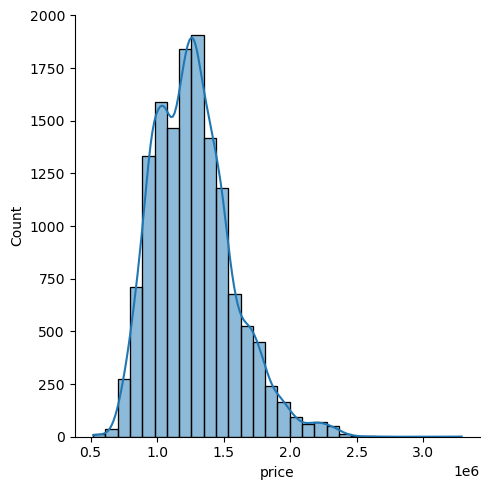

In [23]:
sns.displot(df['price'], bins=30, kde=True)

/Users/zhaoweikennethlim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


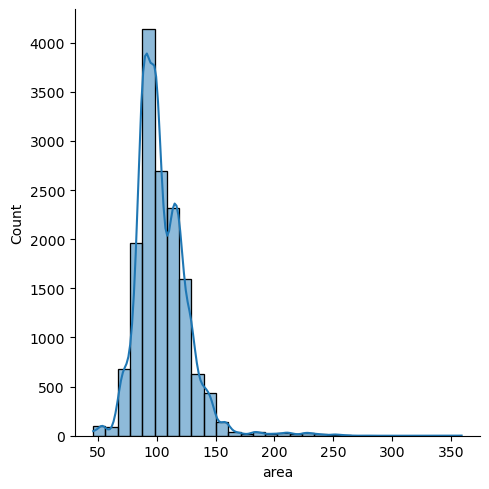

In [13]:
sns.displot(df['area'], bins=30, kde=True)

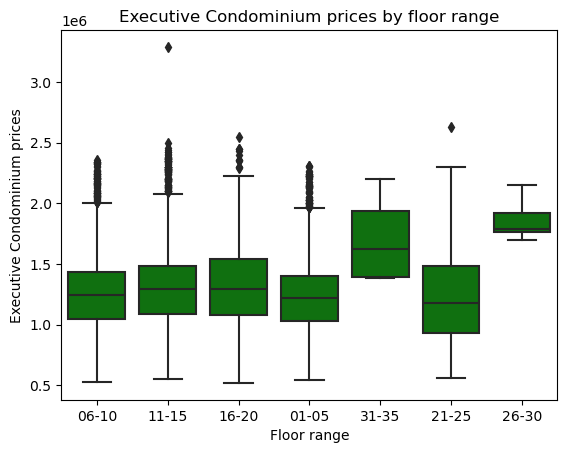

In [24]:
sns.boxplot(data=df, y='price', x='floor_range', color='green')
plt.title('Executive Condominium prices by floor range')
plt.xlabel('Floor range')
plt.ylabel('Executive Condominium prices')
plt.show()

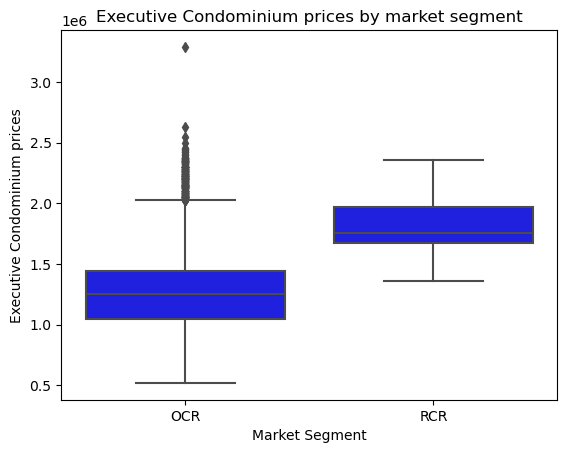

In [25]:
sns.boxplot(data=df, y='price', x='market_segment', color='blue')
plt.title('Executive Condominium prices by market segment')
plt.xlabel('Market Segment')
plt.ylabel('Executive Condominium prices')
plt.show()

/var/folders/vs/pf5rcszd1snbpqpxzh4lgbgw0000gn/T/ipykernel_13600/3077706682.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type_of_sale'] = df['type_of_sale'].map(label_mapping)


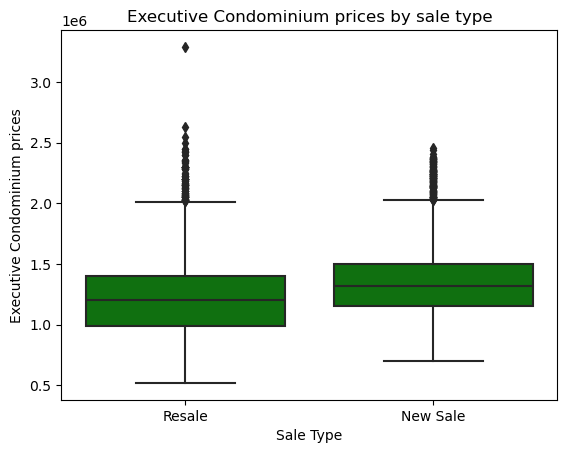

In [26]:
label_mapping = {
    1: 'New Sale',
    2: 'Sub Sale',
    3: 'Resale'
}

df['type_of_sale'] = df['type_of_sale'].map(label_mapping)

sns.boxplot(data=df, y='price', x='type_of_sale', color='green')
plt.title('Executive Condominium prices by sale type')
plt.xlabel('Sale Type')
plt.ylabel('Executive Condominium prices')
plt.show()

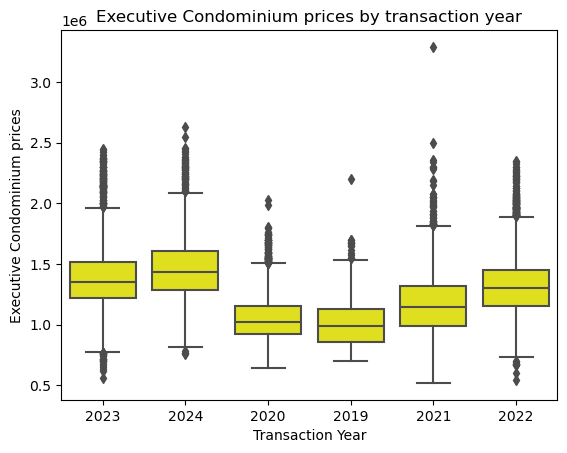

In [27]:
sns.boxplot(data=df, y='price', x='year', color='yellow')
plt.title('Executive Condominium prices by transaction year')
plt.xlabel('Transaction Year')
plt.ylabel('Executive Condominium prices')
plt.show()

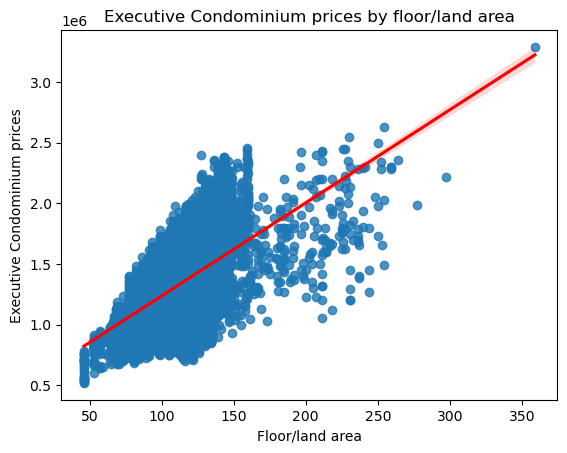

In [28]:
sns.regplot(data=df, x='area', y='price', line_kws={'color': 'red'})
plt.title('Executive Condominium prices by floor/land area')
plt.xlabel('Floor/land area')
plt.ylabel('Executive Condominium prices')
plt.show()

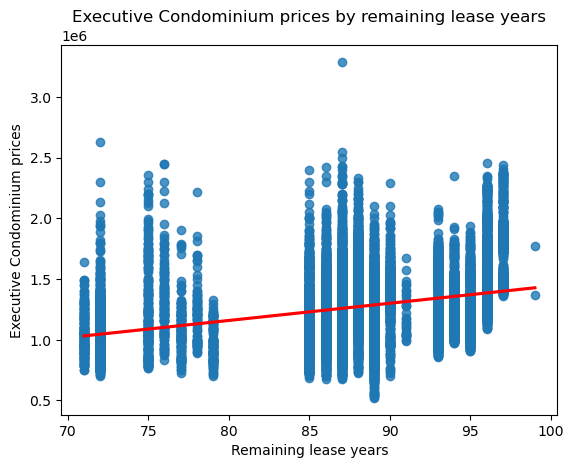

In [29]:
sns.regplot(data=df, x='remaining_lease', y='price', line_kws={'color': 'red'})
plt.title('Executive Condominium prices by remaining lease years')
plt.xlabel('Remaining lease years')
plt.ylabel('Executive Condominium prices')
plt.show()

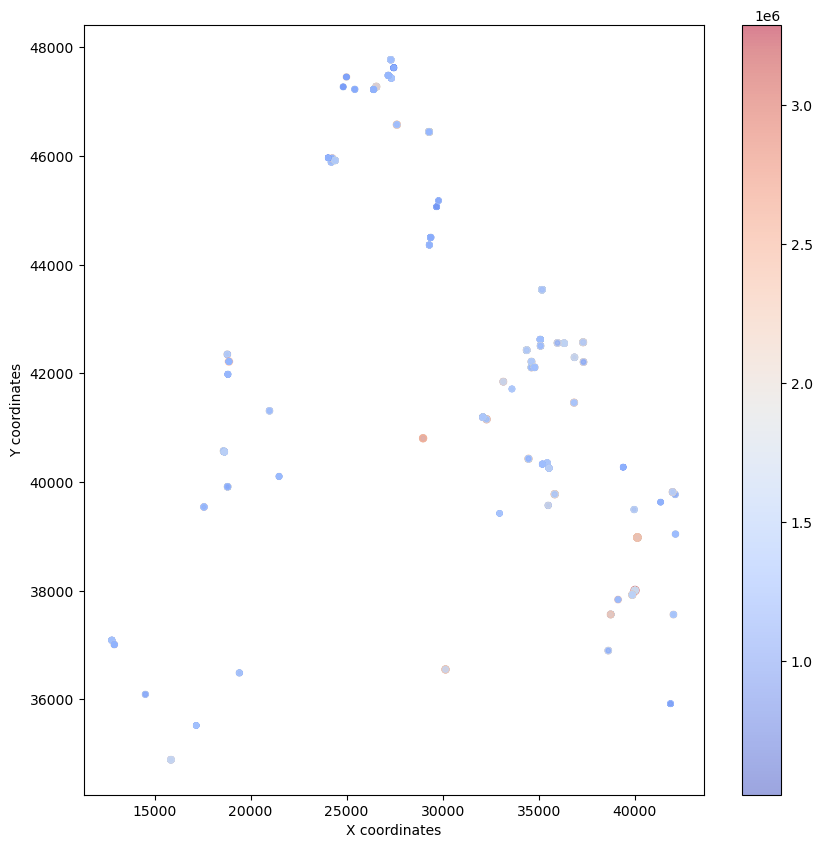

In [11]:
non_null_df = df[df['x_coordinate'].notnull()]

plt.figure(figsize=(10, 10))
#cmap = plt.cm.get_cmap('plasma')
normalize = mcolors.Normalize(vmin=non_null_df['price'].min(), vmax=non_null_df['price'].max())
plt.scatter(non_null_df['x_coordinate'], non_null_df['y_coordinate'], s=non_null_df['price']/100000, alpha=0.5, c=non_null_df['price'], cmap='coolwarm', norm=normalize)
plt.xlabel('X coordinates')
plt.ylabel('Y coordinates')
plt.colorbar()
plt.show()

In [52]:
non_null_df.head(30)

,project_id,transaction_date,area,price,nett_price,property_type,tenure,type_of_area,floor_range,type_of_sale,...,no_of_units,project_name,market_segment,street,x_coordinate,y_coordinate,month,year,start_year,remaining_lease
51950,1924,2023-08,100.0,1365000.0,0.0,Executive Condominium,99 yrs lease commencing from 2010,Strata,06-10,Resale,...,1,RIVERPARC RESIDENCE,OCR,PUNGGOL DRIVE,37324.10899,42209.54801,08,2023,2010,85
51951,1924,2023-08,92.0,1290000.0,0.0,Executive Condominium,99 yrs lease commencing from 2010,Strata,11-15,Resale,...,1,RIVERPARC RESIDENCE,OCR,PUNGGOL DRIVE,37324.10899,42209.54801,08,2023,2010,85
51952,1924,2024-05,100.0,1500000.0,0.0,Executive Condominium,99 yrs lease commencing from 2010,Strata,16-20,Resale,...,1,RIVERPARC RESIDENCE,OCR,PUNGGOL DRIVE,37324.10899,42209.54801,05,2024,2010,85
51953,1924,2024-07,77.0,1238000.0,0.0,Executive Condominium,99 yrs lease commencing from 2010,Strata,06-10,Resale,...,1,RIVERPARC RESIDENCE,OCR,PUNGGOL DRIVE,37324.10899,42209.54801,07,2024,2010,85
51954,1924,2023-08,100.0,1353000.0,0.0,Executive Condominium,99 yrs lease commencing from 2010,Strata,01-05,Resale,...,1,RIVERPARC RESIDENCE,OCR,PUNGGOL DRIVE,37324.10899,42209.54801,08,2023,2010,85
51955,1924,2024-02,100.0,1480000.0,0.0,Executive Condominium,99 yrs lease commencing from 2010,Strata,16-20,Resale,...,1,RIVERPARC RESIDENCE,OCR,PUNGGOL DRIVE,37324.10899,42209.54801,02,2024,2010,85
51956,1924,2024-06,100.0,1480000.0,0.0,Executive Condominium,99 yrs lease commencing from 2010,Strata,06-10,Resale,...,1,RIVERPARC RESIDENCE,OCR,PUNGGOL DRIVE,37324.10899,42209.54801,06,2024,2010,85
51957,1924,2024-09,100.0,1550000.0,0.0,Executive Condominium,99 yrs lease commencing from 2010,Strata,06-10,Resale,...,1,RIVERPARC RESIDENCE,OCR,PUNGGOL DRIVE,37324.10899,42209.54801,09,2024,2010,85
51958,1924,2024-09,100.0,1550000.0,0.0,Executive Condominium,99 yrs lease commencing from 2010,Strata,11-15,Resale,...,1,RIVERPARC RESIDENCE,OCR,PUNGGOL DRIVE,37324.10899,42209.54801,09,2024,2010,85
51959,1924,2023-08,100.0,1418888.0,0.0,Executive Condominium,99 yrs lease commencing from 2010,Strata,11-15,Resale,...,1,RIVERPARC RESIDENCE,OCR,PUNGGOL DRIVE,37324.10899,42209.54801,08,2023,2010,85


In [ ]:
from sklearn.cluster import KMeans

# Select features for clustering
df_with_coords = project_df.dropna(subset=['x_coordinate', 'y_coordinate'])

# Use relevant features for clustering
X = df_with_coords[['x_coordinate', 'y_coordinate']]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
df_with_coords['cluster'] = kmeans.fit_predict(X)

# Assign missing coordinates to their nearest cluster
def impute_coords(row, kmeans_model, df_with_coords):
    if pd.isna(row['x_coordinate']) or pd.isna(row['y_coordinate']):
        # Find the nearest cluster based on other features
        similar_props = df_with_coords[df_with_coords['cluster'] == row['cluster']]
        # Impute missing coordinates with the cluster mean or median
        row['x_coordinate'] = similar_props['x_coordinate'].mean()
        row['y_coordinate'] = similar_props['y_coordinate'].mean()
    return row

df = df.apply(lambda row: impute_coords(row, kmeans, df_with_coords), axis=1)